### Análises e Gráficos relacionado ao tempo de conclusão de cada curso do CERES

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
egressos_ceres = pd.read_csv('../../data/processed/egressos.csv')

In [3]:
egressos_ceres

,matricula,nome_discente,sexo,ano_conclusao,ano_ingresso,id_curso,nome_curso,id_unidade_gestora,nome_unidade_gestora,ano
0,2012905503,ANNA PAULA GOMES DE FARIA,F,2020,2012,2000064,PEDAGOGIA,1482,CENTRO DE ENSINO SUPERIOR DO SERIDÓ,2020
1,2012905675,IZANETE DE MEDEIROS COSTA,F,2020,2012,2000064,PEDAGOGIA,1482,CENTRO DE ENSINO SUPERIOR DO SERIDÓ,2020
2,2013023472,ERIKA FERREIRA DE MEDEIROS,F,2020,2013,2000012,CIÊNCIAS CONTÁBEIS,1482,CENTRO DE ENSINO SUPERIOR DO SERIDÓ,2020
3,2013028020,ELAINE CRISTINA DA SILVA,F,2020,2013,2000064,PEDAGOGIA,1482,CENTRO DE ENSINO SUPERIOR DO SERIDÓ,2020
4,2013035286,WALÉRIA KALIANDRA ARAÚJO SANTOS,F,2020,2013,111635060,HISTÓRIA,1482,CENTRO DE ENSINO SUPERIOR DO SERIDÓ,2020
...,...,...,...,...,...,...,...,...,...,...
792,20210025172,ALEX NUNES DA SILVA,M,2023,2021,2000044,BAC. GEOGRAFIA,1482,CENTRO DE ENSINO SUPERIOR DO SERIDÓ,2023
793,20210073895,DHELMAN SALETE MELO DE MEDEIROS,F,2023,2021,2000019,DIREITO,1482,CENTRO DE ENSINO SUPERIOR DO SERIDÓ,2023
794,20210076000,JORGE LUAN DO NASCIMENTO,M,2023,2021,111635060,HISTÓRIA,1482,CENTRO DE ENSINO SUPERIOR DO SERIDÓ,2023
795,20210091955,ANI HELEN DA SILVA ALVES,F,2023,2021,2000019,DIREITO,1482,CENTRO DE ENSINO SUPERIOR DO SERIDÓ,2023


In [4]:
egressos_ceres['tempo_curso'] = egressos_ceres['ano_conclusao'] - egressos_ceres['ano_ingresso']

egressos_por_curso = (
    egressos_ceres
    .groupby('nome_curso')['tempo_curso']
    .agg(media='mean', desvio_padrao='std', total='count')
    .round(2)
    .reset_index()
)
egressos_por_curso

,nome_curso,media,desvio_padrao,total
0,BAC. GEOGRAFIA,4.75,1.48,51
1,CIÊNCIAS CONTÁBEIS,4.85,1.19,97
2,DIREITO,4.28,1.16,152
3,HISTÓRIA,3.95,1.87,137
4,LIC. GEOGRAFIA,3.39,1.23,105
5,MATEMÁTICA,4.55,1.32,55
6,PEDAGOGIA,4.24,0.91,146
7,SISTEMAS DE INFORMAÇÃO,6.24,2.12,54


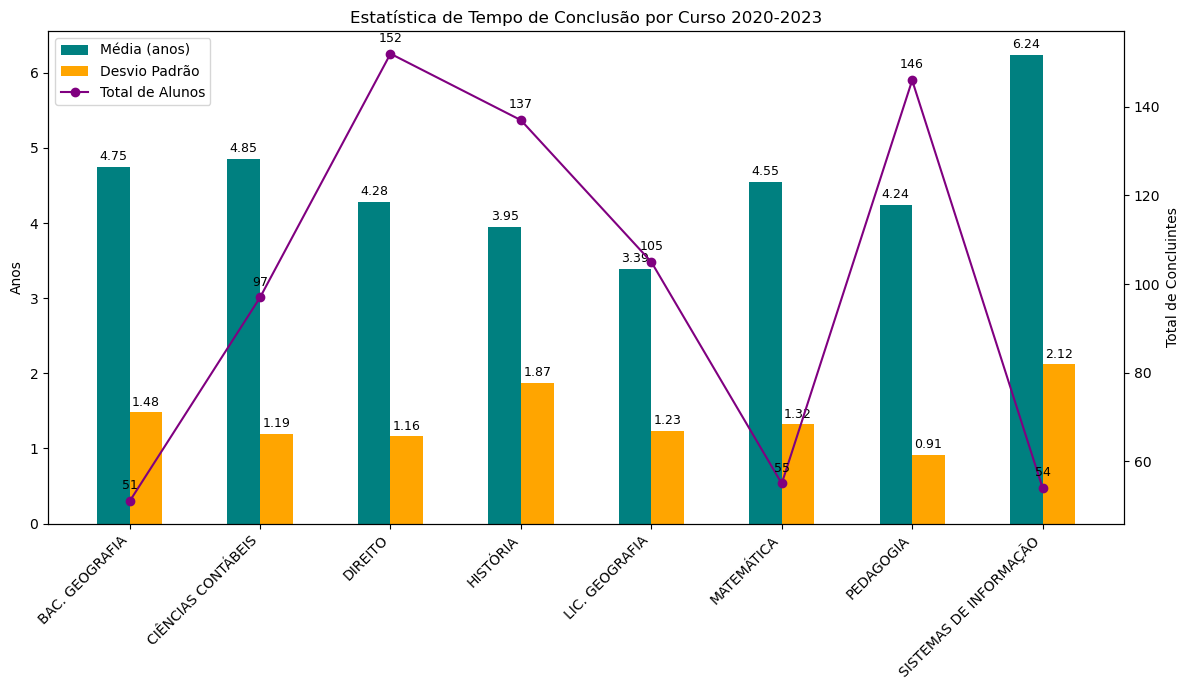

In [5]:
x = np.arange(len(egressos_por_curso['nome_curso']))
width = 0.25 

fig, ax1 = plt.subplots(figsize=(12, 7))

# Barras para média e desvio padrão
barras_media = ax1.bar(x - width/2, egressos_por_curso['media'], width, label='Média (anos)', color='teal')
barras_desvio = ax1.bar(x + width/2, egressos_por_curso['desvio_padrao'], width, label='Desvio Padrão', color='orange')

ax1.set_ylabel('Anos')
ax1.set_xticks(x)
ax1.set_xticklabels(egressos_por_curso['nome_curso'], rotation=45, ha='right')
ax1.set_title('Estatística de Tempo de Conclusão por Curso 2020-2023')

for barra in barras_media:
    altura = barra.get_height()
    ax1.text(barra.get_x() + barra.get_width()/2, altura + 0.05, f'{altura:.2f}', ha='center', va='bottom', fontsize=9)

for barra in barras_desvio:
    altura = barra.get_height()
    ax1.text(barra.get_x() + barra.get_width()/2, altura + 0.05, f'{altura:.2f}', ha='center', va='bottom', fontsize=9)
    
# Cria um eixo y secundário para o total de alunos
ax2 = ax1.twinx()
linha_total = ax2.plot(x, egressos_por_curso['total'], color='purple', marker='o', label='Total de Alunos')
ax2.set_ylabel('Total de Concluintes')

for i, valor in enumerate(egressos_por_curso['total']):
    ax2.text(x[i], valor + 2, str(valor), color='black', ha='center', va='bottom', fontsize=9)

# Combina as legendas dos dois eixos
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.tight_layout()
plt.show()